In [1]:
from sympy import *
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

#### Мой вариант - 18:

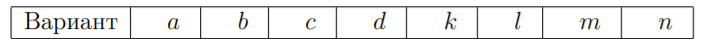

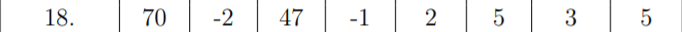

## Формулы:
#### q1 = a + b*p1
#### q2 = c + d*p2
#### C = k * (q1 ** 2) + l * q1 * q2 + m * (q2 ** 2) + n
#### P =  p1 * q1+p2 * q2−C

## Формулы с моими данными:
#### q1 = 70 -2 * p1
#### q2 = 47 -1 * p2
#### C = 2 * (q1 ** 2) + 5 * q1 * q2 + 3 * (q2 ** 2) + 5
#### P =  p1 * q1 + p2 * q2 - C

In [5]:
def _input_():
    
    try:
        q1 = input("q1 = ")
        q2 = input("q2 = ")
        C = input("C = ") 
        P = input("P = ")
        return (q1, q2, C, P)
    
    except ValueError:
        print("Ошибка ввода!")
        return None
    
    except KeyboardInterrupt:
        print("Прервано пользователем")
        return None
    
def check_mistakes(varibles):
    for i in varibles:
        try:
            sympify(i)
        except SympifyError:
            print("Неверный ввод")
            return False
    return True

func = _input_()

if func != None: 
    formula = check_mistakes(func)
    if formula != False:
        print("Данные верны.")
    else:
        print("Попробуйте ввести без ошибок.")
else:
    print("Попробуйте ввести без ошибок.")

q1 = 70 -2 * p1
q2 = 47 -1 * p2
C = 2 * (q1 ** 2) + 5 * q1 * q2 + 3 * (q2 ** 2) + 5
P = p1 * q1 + p2 * q2 - C
Данные верны.


#  Подставим в С и Р формулы q1 и q2

In [11]:
q1, q2, C, P = func
q1_E = sympify(q1)
q2_E = sympify(q2)
C_E = sympify(C)
C_E = C_E.subs([("q1", q1), ("q2", q2)])
P_E = sympify(P)
P_E = P_E.subs([("q1", q1), ("q2", q2), ("C", C_E)])

print("С = ", C_E)
print("\nP = ", P_E)

С =  3*(47 - p2)**2 + 5*(47 - p2)*(70 - 2*p1) + 2*(70 - 2*p1)**2 + 5

P =  p1*(70 - 2*p1) + p2*(47 - p2) - 3*(47 - p2)**2 - 5*(47 - p2)*(70 - 2*p1) - 2*(70 - 2*p1)**2 - 5


In [12]:
result = optimize.minimize(lambda x: -lambdify(["p1", "p2"], P_E)(x[0], x[1]), x0=(0, 0), method="BFGS")
result

      fun: -141.49999999999832
 hess_inv: array([[ 0.13400205, -0.1671437 ],
       [-0.1671437 ,  0.3337092 ]])
      jac: array([-5.7220459e-06, -5.7220459e-06])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([33.49999981, 42.99999961])

In [13]:
p1_max, p2_max, extremum = result.x[0], result.x[1], -result.fun

In [14]:
print(extremum)
print(p1_max, p2_max)

141.49999999999832
33.49999981092808 42.99999961312253


In [74]:
def foo():
    plt.figure() 
    ax = plt.figure().add_subplot(projection='3d')
    x = np.linspace(int(-p1_max) * 5, p1_max * 5, int(p1_max)*10) 
    y = np.linspace(int(-p2_max) * 5, p2_max * 5, int(p2_max)*10) 
    X, Y = np.meshgrid(x, y) 
    Z = lambdify(["p1", "p2"], P_E)(X, Y) 
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis') 
    ax.scatter(p1_max, p2_max, extremum, s=10, color="red") 
    ax.text(p1_max + 2, p2_max + 5, extremum + 2, f'М*{int(p1_max), int(p2_max)}', color='red')
    plt.title("Прибыль фирмы-монополиста, тыс. руб.") 
    plt.xlabel("Цена единицы товара x1") 
    plt.ylabel("Цена единицы товара x2") 
    plt.show()

<Figure size 432x288 with 0 Axes>

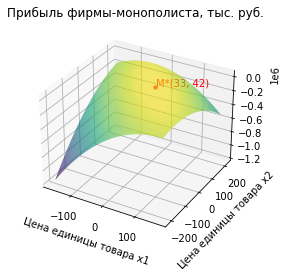

In [75]:
foo()

In [97]:
def draw_contour():
    x, y = np.mgrid[-5 * p1_max:p1_max * 5, -5 * p2_max:p2_max * 5]
    z = lambdify(["p1", "p2"], P_E)(x, y)

    fig, ax = plt.subplots()
    ax.contour(x, y, z, levels=20)
    fig.set_figwidth(8)
    fig.set_figheight(8)
    plt.title("Прибыль фирмы монополиста, тыс. руб.")
    plt.xlabel("Цена единицы товара x1")
    plt.ylabel("Цена единицы товара x2")
    plt.plot(p1_max, p2_max, marker="o", markersize=4, markeredgecolor="blue", markerfacecolor="green")
    plt.text(p1_max + 10,p2_max + 20,f'M*{int(p1_max), int(p2_max)}',horizontalalignment='right')
    plt.show()

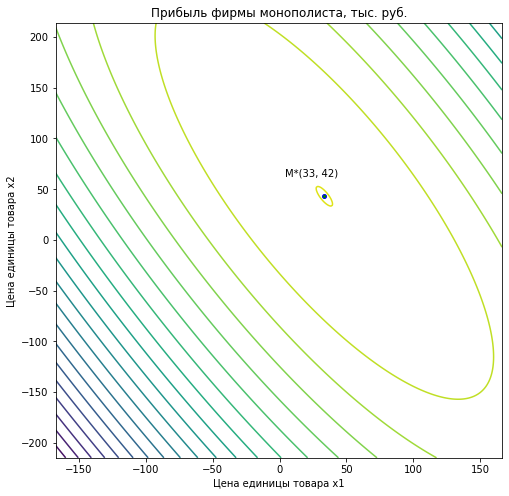

In [98]:
draw_contour()

In [99]:
print("ОТВЕТ: ")
print(f"Оптимальный план (q1*;q2*) = {int(p1_max), int(p2_max)}, Максимальная прибыль П(q1*;q2*) = {int(extremum)} ")

ОТВЕТ: 
Оптимальный план (q1*;q2*) = (33, 42), Максимальная прибыль П(q1*;q2*) = 141 
